In [13]:
%matplotlib inline
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
import itertools
import glob
import csv

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#preprocess the images

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = 'data/'

skin_df = pd.read_csv(path + 'HAM10000_metadata.csv')

image_path = path + 'HAM_images'

<AxesSubplot:>

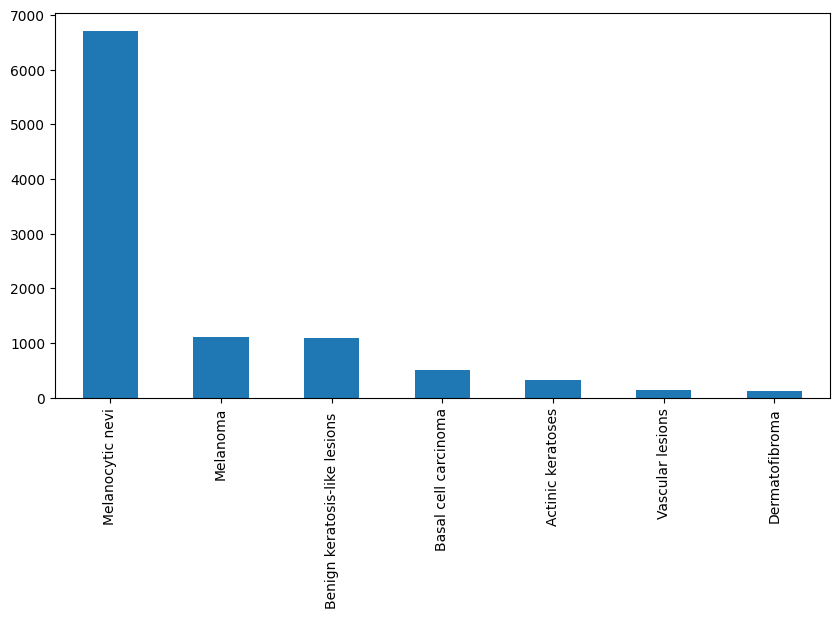

In [4]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Creating New Columns for better readability
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 

skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)
skin_df.isnull().sum()

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

risky  cell_type                     
0      Dermatofibroma                     115
       Melanocytic nevi                  6705
       Vascular lesions                   142
1      Actinic keratoses                  327
       Basal cell carcinoma               514
       Benign keratosis-like lesions     1099
       Melanoma                          1113
dtype: int64

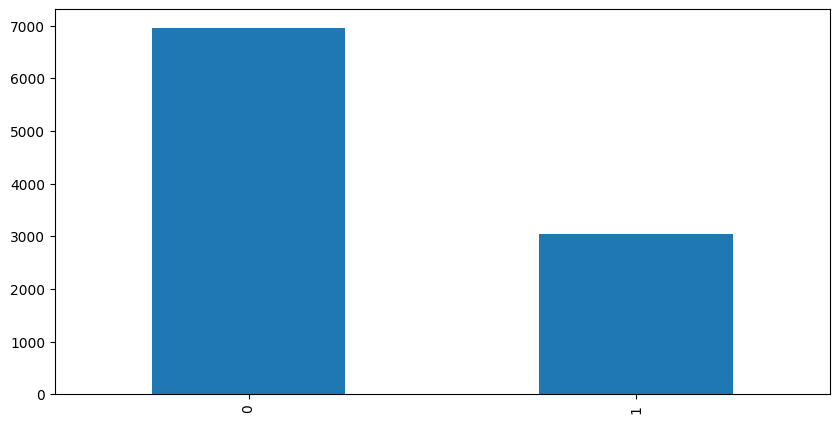

In [5]:
#Make new column, risky  = 1, not risky = 0
skin_df['risky'] = skin_df['cell_type'].apply(lambda x : 0 if ((x == 'Melanocytic nevi') | (x == 'Benign keratosis-like lesions') | (x == 'Dermatofibroma') | (x == 'Vascular lesions')) else 1)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['risky'].value_counts().plot(kind='bar', ax=ax1)

skin_df.groupby(['risky', 'cell_type']).size()

In [6]:
#split test train
features=skin_df.drop(columns=['risky'],axis=1)
target=skin_df['risky']
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.20,random_state=1234)

In [ ]:
#separate training and testing images before processing
try: 
    os.mkdir('data/train_images')
    
    os.mkdir('data/test_images')

except:
    pass
train_img_dir = 'data/train_images/'
train_img_list = list(X_train['image_id'])

for image in train_img_list:
    shutil.copy('data/HAM_images/'+ str(image) + '.jpg', train_img_dir + str(image) + '.jpg' )
    
test_img_dir = 'data/test_images/'
test_img_list = list(X_test['image_id'])

for image in test_img_list:
    shutil.copy('data/HAM_images/'+ str(image) + '.jpg', test_img_dir + str(image) + '.jpg')
   

In [ ]:

median_filter = cv2.medianBlur(image, 5)

image_adapt_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)



kernel = np.ones((3,3),np.uint8)

morph = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


In [ ]:
#resize images
def resize(image):
# read and reduce the image size to 512 by 512 pixels 
     image = cv2.imread(image)
     image_resize = cv2.resize(image,(512,512))

     return image_resize

In [ ]:
# Create an Edge detection Laplacian filter
def edge_detection(image):
    # Create an Edge detection Laplacian filter
    lap = cv2.Laplacian(image,cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))

    return lap

In [ ]:
def hair_remove(image):
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    final_image = cv2.medianBlur(final_image,5)
    
    return final_image

In [ ]:
# Hair removal and adaptive threshold 
    final_image = hair_remove(image_resize)
    gray = cv2.cvtColor(final_image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,256,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,73,7)

In [ ]:
# finding the contours on the image 
def find_contours(image):
    c,h=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    cv2.drawContours(image_resize,c,-1,(0,255,0),3)

In [ ]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob.glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)                     

In [ ]:
def process_image(image):
    

In [ ]:
#now process training images

train_img_list = list(X_train['image_id'])

for image in os.listdir(image_path):
    
    try:
        os.mkdir(path + '/processed_images')
        process_image(image)
    except:
        pass

In [ ]:
#image surf
#sift
